# Error Analysis

In [ ]:
## transfer to np array for error analysis

# X_train_1 = np.squeeze(np.asarray(X_train))
# y_train_1 = np.squeeze(np.asarray(y_train))
# X_test_1 = np.squeeze(np.asarray(X_test))
# y_test_1 = np.squeeze(np.asarray(y_test))

In [ ]:
## import error analysis library
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
import scipy.stats as stats

## Residual plot

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

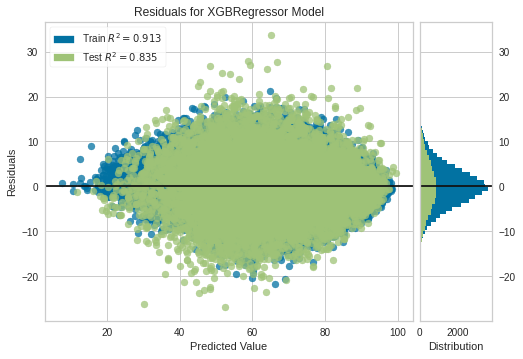

In [ ]:
visualizer = ResidualsPlot(xg_reg)

visualizer.fit(X_train_1, y_train_1)  # Fit the training data to the visualizer
visualizer.score(X_test_1, y_test_1)  # Evaluate the model on the test data
visualizer.show()  

### Interpretations

In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.


Prediction Error Plot


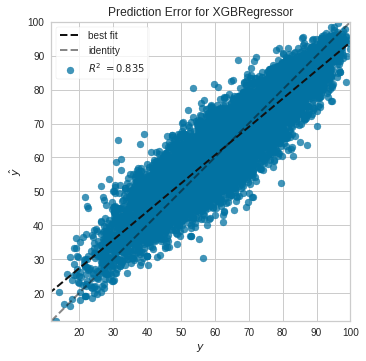

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3432bb8610>,
                estimator=XGBRegressor(alpha=10, colsample_bytree=0.3,
                                       learning_rate=0.05, max_depth=5,
                                       n_estimators=2500))


In [ ]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xg_reg, X_train_1, y_train_1, X_test_1, y_test_1))


### Interpretations

We can see that most of the points are on a straight line. We can compare this plot against the 45-degree line, where the prediction exactly matches the model. In general, the predictions follow the actualS.

## Cook's distance

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coeficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.

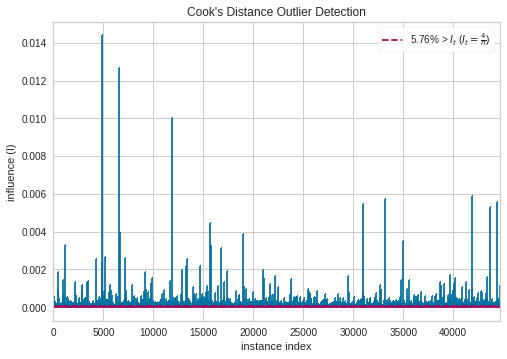

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3432849550>)

In [ ]:
cooks_distance(
    X_train_1, y_train_1,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In particular, there are several (5.76%）of the observations with Cook’s distance values that are relatively higher than the others.

## Q-Q plot

To check the assumption of the normality of the data generating process, we can use Q-Q plot of the normalized residuals.

Text(0.5, 1.0, 'Normal Q-Q Plot')

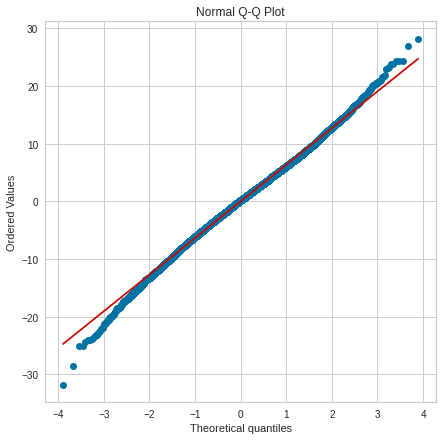

In [ ]:
residuals = y_test["pct_pop_hs+"] - y_pred.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Interpretations

We can see that the residuals are fitted to the line, although there are some outliers found at both end